Steps:
	1.	Read and Display the Image using OpenCV.
	2.	Preprocessing:
	•	Resize the image to 256x256.
	•	Normalize pixel values between 0 and 1.
	•	Apply Gaussian Blur.
	•	Apply Edge Detection (Canny).
	3.	Augmentation:
	•	Flip horizontally.
	•	Rotate by 45°.
	•	Add synthetic Gaussian noise.
	•	Adjust brightness & contrast.
	4.	Advanced Step:
	•	Overlay some text (e.g., “Week 31 Task”) with transparency on the rotated image.
	5.	Combine Results:
	•	Arrange original + all processed images in a 3×3 grid (collage).
	6.	Display Final Output in a single OpenCV window.

## Reading and Displaying

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('New_Zealand_Boat.jpg', cv2.IMREAD_COLOR)

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [9]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

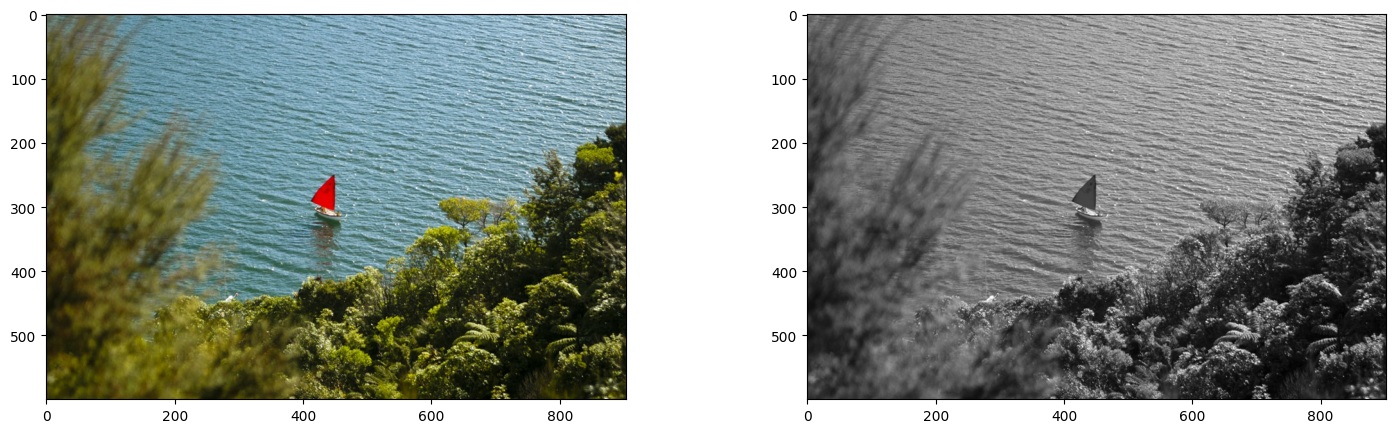

In [11]:
plt.figure(figsize=(18,5))

plt.subplot(121); plt.imshow(image_rgb)
plt.subplot(122);plt.imshow(gray, cmap='gray')

## Preprocessing

### Resizing

In [16]:
gray.shape

(600, 903)

In [21]:
size = (256, 256)
resized = cv2.resize(gray, size)
resized.shape

(256, 256)

### cropping

In [22]:
cropped = image_rgb[200:400, 300:600]

### flipping

In [25]:
flippped = cv2.flip(image_rgb, -1)

### normalization

In [28]:
normalized = cv2.normalize(gray, None, 0, 1, cv2.NORM_MINMAX)

### blurring or smoothing

In [41]:
blurred = cv2.GaussianBlur(image_rgb, (11,11), 0)

### brightness and contrast

In [60]:
brighter = cv2.convertScaleAbs(image_rgb, alpha=1.4, beta=-40)

### thresholding

In [81]:
retval, thresholded = cv2.threshold(gray, 100, 255, cv2.THRESH_OTSU)

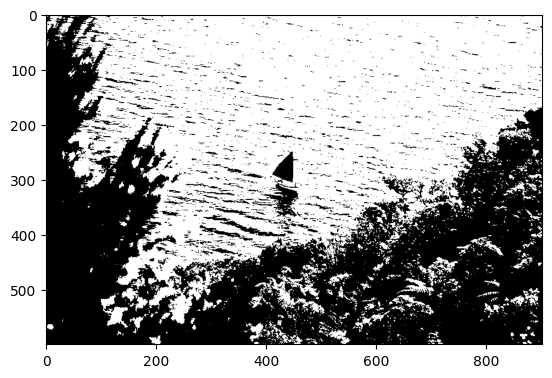

In [82]:
plt.imshow(thresholded, cmap='gray')

In [92]:
ad_thresh = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 5, 2)

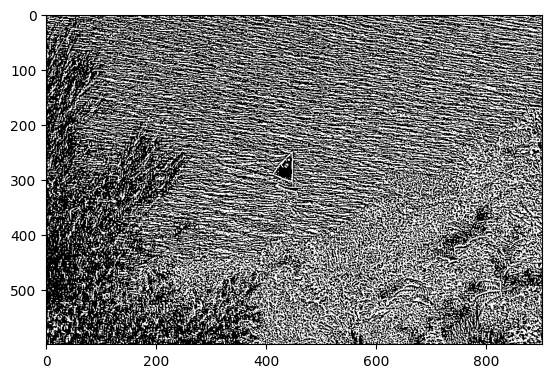

In [93]:
plt.imshow(ad_thresh, cmap='gray')

### edge detection

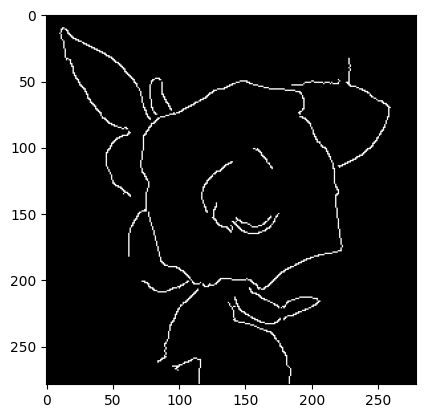

In [96]:
edge_img = cv2.imread('edge_flower.png', cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(edge_img, (5,5), 0)
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges, cmap='gray')

## Augmentations

### rotations

In [101]:
h,w = image_rgb.shape[:2]
M = cv2.getRotationMatrix2D((w//2, h//2), 45, 1.0)
rotated = cv2.warpAffine(image_rgb, M, (w,h))

### translations

In [103]:
M = np.float32([[1,0,50], [0,1,30]])
translated = cv2.warpAffine(image_rgb, M, (w,h))

### Scaling

In [107]:
scaled = cv2.resize(image_rgb, None, fx=1.5, fy=1.5)

In [108]:
flipped = cv2.flip(image_rgb, -1)

In [111]:
img = image_rgb.copy()

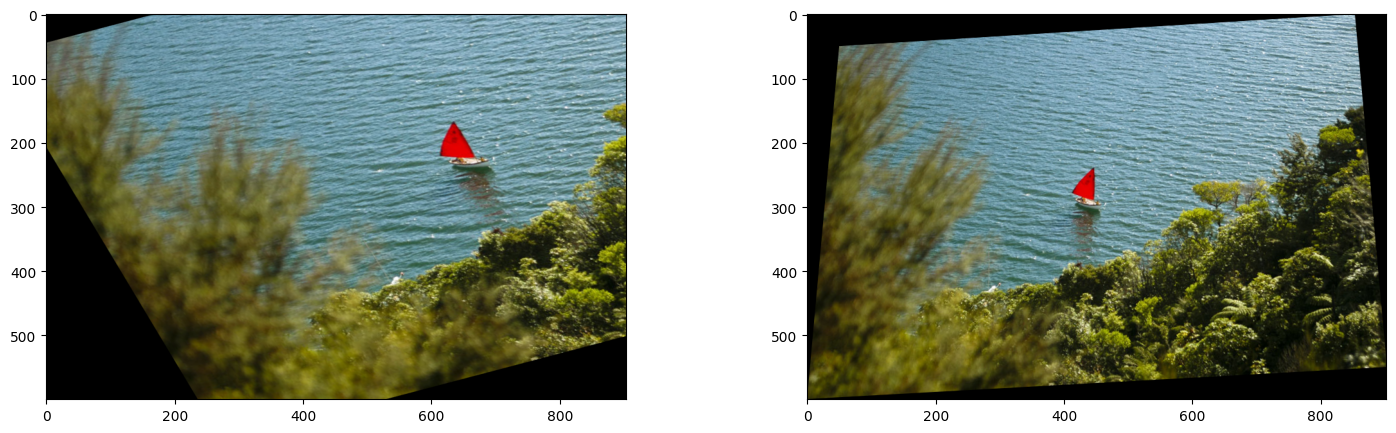

In [112]:
pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])

M = cv2.getAffineTransform(pts1, pts2)
affine = cv2.warpAffine(img, M, (w, h))

pts1 = np.float32([[0,0], [w,0], [0,h], [w,h]])
pts2 = np.float32([[50,50], [w-50,0], [0,h], [w,h-50]])

M = cv2.getPerspectiveTransform(pts1, pts2)
perspective = cv2.warpPerspective(img, M, (w, h))

plt.figure(figsize=(18,5))
plt.subplot(121); plt.imshow(affine)
plt.subplot(122); plt.imshow(perspective)

### Synthetic Noise

In [115]:
noise = np.random.normal(0, 25, img.shape)
gaussian = img + noise
gaussian = np.clip(gaussian, 0, 255).astype(np.uint8)

## Advanced

In [116]:
text_img = cv2.putText(
    img,
    'OpenCV Demo',
    (50,50),
    cv2.FONT_HERSHEY_DUPLEX,
    1,(0,255,0),2
)

In [123]:
img1 = cv2.resize(gray, (256, 256))
img2 = cv2.resize(edges, (256, 256))

overlay = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

### contours

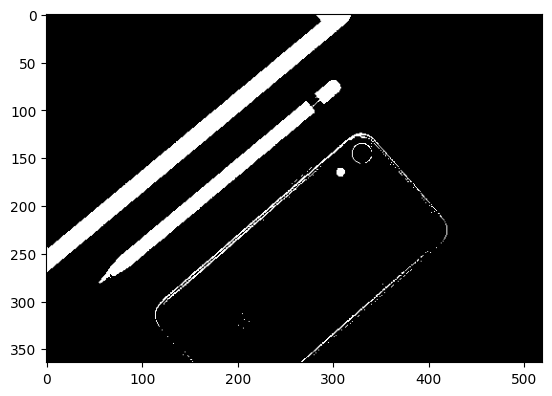

In [4]:
image = cv2.imread('contour_detection_img.png', cv2.IMREAD_GRAYSCALE)

ret, thresh = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [5]:
contours, heirarchy = cv2.findContours(
    image = thresh,
    mode = cv2.RETR_TREE,
    method = cv2.CHAIN_APPROX_NONE
)

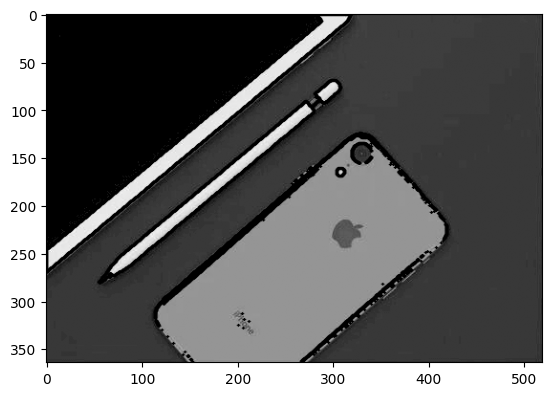

In [9]:
image_copy = image.copy()
cv2.drawContours(
    image = image_copy,
    contours = contours,
    contourIdx = -1,
    color = (0,255,0),
    thickness=2,
    lineType = cv2.LINE_AA
)

plt.imshow(image_copy, cmap='gray')

In [ ]:
cont_diff = cv2.matchShapes(contour1[0], contour2[0], cv2.CONTOURS_MATCH_I1, 0)
cont_diff

### template matching

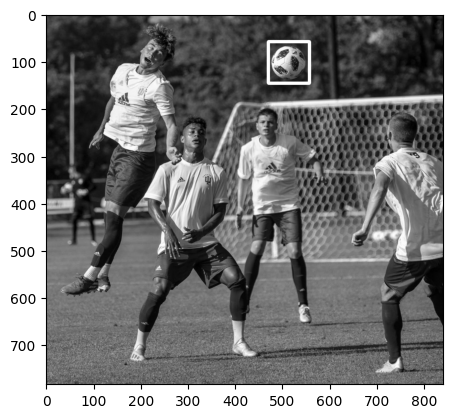

In [11]:
img = cv2.resize(cv2.imread('soccer_practice.jpg', 0), (0,0), fx=0.7, fy=0.7)
template = cv2.resize(cv2.imread('ball.png', 0), (0,0), fx=0.7,  fy=0.7)

h, w = template.shape

result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
location = max_loc
bottom_right = (location[0]+w, location[1]+h)
cv2.rectangle(img, location, bottom_right, 255, 5)
plt.imshow(img, cmap='gray')